# Business-Understanding

As a Data Scientist, your task is to develop a predictive model to identify purchase intent for a segment of our online users. The goal is to accurately predict which users are likely to make a purchase during their web session, enabling the business to target potential buyers more effectively.

# Data-Understanding

The data is from [Kaggle](https://www.kaggle.com/competitions/22122shop/data)

There are 18 variables with 10 quantitative and 7 categorical input features, 500K observations (one row or web session per online user) in a tabular format with the first 50K rows missing the Rev revenue flag (1 for purchase intent and 0 otherwise). The data was collected for the period of 1 year.

Features description (from the dataset authors):

1. `Administrative (Adm)`, `Informational (Inf)`,` Product Related (Prd)`: 
    - counts of different page types viewed by the user in that session. Values are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.
2. `Administrative Duration (AdmDur)`, `Informational Duration (InfDur)`, and `Product Related Duration (PrdDur)`: 
    - total time spent on the page of the specified type.
3. `Bounce Rate (BncRt):` 
    - %visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. Measured by Google Analytics
4. `Exit Rate (ExtRt)`: 
    - %visitors that were the last in the session. Calculated as for all pageviews to the page. Measured by Google Analytics.
5. `Page Value (PgVal)`: 
    - average value for a web page that the user visited before completing an e-commerce transaction.
6. `Special Day (SpclDay)`: 
    - closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine's day, this value takes a nonzero value between Feb 2 and Feb 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on Feb 8.
7. `Operating system (OS)` of the user's PC
8. `Browser (Bsr)`: web user's web browser
9. `Region (Rgn) `of the web user
10. `Traffic type (TfcTp)`: TBD
11. `Visitor type (VstTp)`: Type of visitor
12. `Weekend (Wknd)`: whether the page view event took place on weekend
13. `Month of the year (Mo)`: the month of the page view event

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
sns.set_style('darkgrid')

In [19]:
df = pd.read_csv('XY_Shop.csv')
df

,Adm,AdmDur,Inf,InfDur,Prd,PrdDur,BncRt,ExtRt,PgVal,SpclDay,Mo,OS,Bsr,Rgn,TfcTp,VstTp,Wkd,Rev
0,0,0.00,0,0.00,18,132.99,0.038211,0.054523,0.000000,0.0,4,3,1,1,2,0,1,NaN
1,1,0.00,0,0.00,37,1150.20,0.001245,0.030321,0.000000,0.0,11,2,2,4,2,0,1,NaN
2,6,191.98,0,0.00,38,1266.78,0.004742,0.019551,17.816864,0.0,10,2,3,1,3,0,0,NaN
3,3,263.68,0,0.00,24,749.14,0.004474,0.024079,14.578547,0.0,7,2,2,2,1,0,1,NaN
4,0,0.00,0,0.00,3,136.41,0.000000,0.066300,0.000000,0.0,12,1,1,3,3,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,14,262.46,0,0.00,170,3967.02,0.003314,0.015669,2.904034,0.0,12,2,2,4,2,0,0,0.0
499996,0,0.00,0,0.00,7,295.57,0.000000,0.000000,0.000000,0.0,9,1,5,4,3,0,0,0.0
499997,6,134.64,3,92.28,30,888.50,0.000000,0.003452,30.172020,0.0,11,2,2,1,4,0,0,0.0
499998,0,0.00,0,0.00,27,1185.14,0.000000,0.001593,0.000000,0.0,5,2,2,2,3,0,1,0.0


# EDA

## Data-Cleaning

We first split the data to remove the rows with missing values in the rev column.

In [20]:
# checking the missing values
df.isna().sum().sum()

50000

In [21]:
missing_rev = df.loc[df.Rev.isna()]
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450000 entries, 50000 to 499999
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Adm      450000 non-null  int64  
 1   AdmDur   450000 non-null  float64
 2   Inf      450000 non-null  int64  
 3   InfDur   450000 non-null  float64
 4   Prd      450000 non-null  int64  
 5   PrdDur   450000 non-null  float64
 6   BncRt    450000 non-null  float64
 7   ExtRt    450000 non-null  float64
 8   PgVal    450000 non-null  float64
 9   SpclDay  450000 non-null  float64
 10  Mo       450000 non-null  int64  
 11  OS       450000 non-null  int64  
 12  Bsr      450000 non-null  int64  
 13  Rgn      450000 non-null  int64  
 14  TfcTp    450000 non-null  int64  
 15  VstTp    450000 non-null  int64  
 16  Wkd      450000 non-null  int64  
 17  Rev      450000 non-null  float64
dtypes: float64(8), int64(10)
memory usage: 65.2 MB


Now we check for duplicates

In [22]:
df.duplicated().sum()

87

In [23]:
df.drop_duplicates(inplace=True)
df

,Adm,AdmDur,Inf,InfDur,Prd,PrdDur,BncRt,ExtRt,PgVal,SpclDay,Mo,OS,Bsr,Rgn,TfcTp,VstTp,Wkd,Rev
50000,0,0.00,0,0.00,1,0.00,0.157489,0.115168,0.000000,0.0,12,2,2,1,9,0,0,0.0
50001,7,116.19,0,0.00,79,2683.58,0.000000,0.001910,0.000000,0.0,4,2,3,2,2,1,0,0.0
50002,6,233.07,0,0.00,8,171.08,0.033427,0.062316,0.000000,0.0,12,2,2,2,1,0,0,0.0
50003,0,0.00,0,0.00,5,0.00,0.140943,0.160706,0.000000,0.0,6,2,2,3,5,0,0,0.0
50004,0,0.00,0,0.00,6,112.57,0.035324,0.021440,0.000000,0.0,10,2,2,4,7,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,14,262.46,0,0.00,170,3967.02,0.003314,0.015669,2.904034,0.0,12,2,2,4,2,0,0,0.0
499996,0,0.00,0,0.00,7,295.57,0.000000,0.000000,0.000000,0.0,9,1,5,4,3,0,0,0.0
499997,6,134.64,3,92.28,30,888.50,0.000000,0.003452,30.172020,0.0,11,2,2,1,4,0,0,0.0
499998,0,0.00,0,0.00,27,1185.14,0.000000,0.001593,0.000000,0.0,5,2,2,2,3,0,1,0.0


## Page Visits

Adm     2
Inf     0
Prd    30
dtype: int32


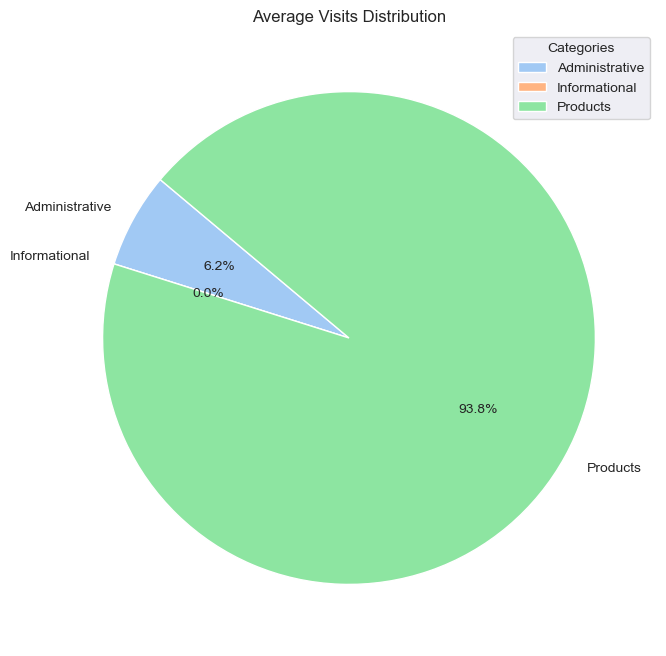

In [24]:
page_visits = df[['Adm', 'Inf', 'Prd']]

# plotting the average page visits per session
avg_visits = page_visits.mean().astype(int)
print(avg_visits)


full_names = {'Inf': 'Informational',
              'Adm': 'Administrative', 'Prd': 'Products'}
colors = sns.color_palette('pastel')  # Seaborn color palette

plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(avg_visits, labels=avg_visits.index.map(full_names),
        autopct='%1.1f%%', startangle=140, colors=colors)

# Add a custom legend
plt.legend(title="Categories", loc="best")

plt.title('Average Visits Distribution')
plt.show()

- Products page averages the most visits per session with about 30 per session.
- There is a contrast in page visits for the Administrative pages with an average of 0 visits per session.
- Informational pages averages no visits per session.

AdmDur      76.870743
InfDur      31.830116
PrdDur    1165.230601
dtype: float64


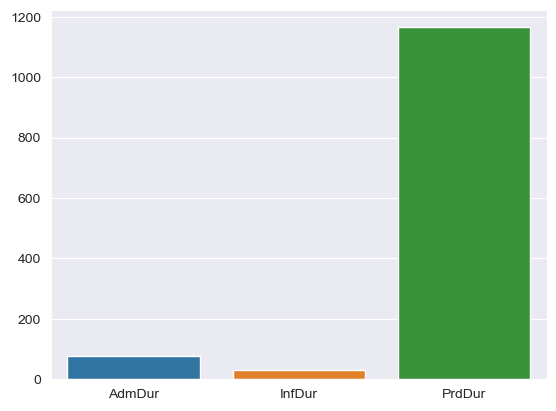

In [25]:
page_time = df[['AdmDur', 'InfDur','PrdDur']]
avg_page_time = page_time.mean()
print(avg_page_time)

# plotting
sns.barplot(x=avg_page_time.index, y=avg_page_time);

Same case for the duration, most time is spent on the product pages compared to the administrative and informational pages.

## Bounce and Exit Rates

In [26]:
bounce_exit = df[['BncRt', 'ExtRt']]
bounce_exit.mean()

BncRt    0.018359
ExtRt    0.036841
dtype: float64

- Bounce rate is relatively low at around 2%.
- Same case for Exit rate at around 4%

## Purchases on different times of the year

In [27]:
monthly_rev = df.groupby('Mo')['Rev'].sum().reset_index()
monthly_rev

,Mo,Rev
0,1,252.0
1,2,4388.0
2,3,4440.0
3,4,11889.0
4,5,8223.0
5,6,9561.0
6,7,3218.0
7,8,3813.0
8,9,4389.0
9,10,14331.0


we now convert the month numbers to the actual names of the months then plot.


In [28]:
import calendar

# Transforming the month column
monthly_rev['Mo'] = monthly_rev.Mo.map(
    lambda x: calendar.month_name[int(x)]
)

c:\Users\mutis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mutis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


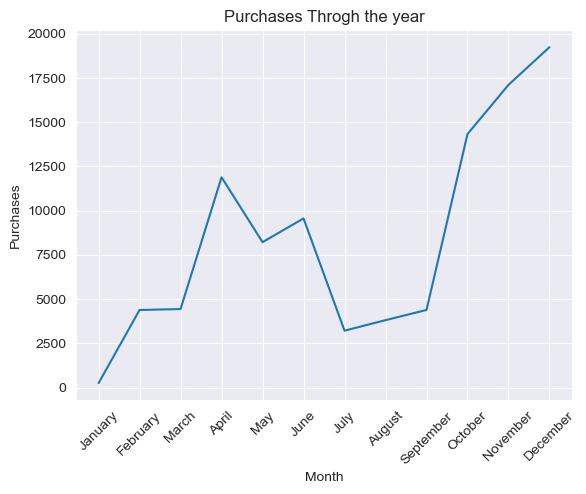

In [29]:
# plotting the distribution
sns.lineplot(
    monthly_rev,
    x='Mo', 
    y='Rev'
)
plt.xlabel('Month')
plt.ylabel('Purchases')
plt.title('Purchases Throgh the year')
plt.xticks(rotation=45);

- Purchases tend to peak in October and continue to rise steadily, reaching their highest levels by the end of the year. This can be contributed by special events such as holiday shopping and special promotions among others.
- Purchases tend to be lowest in January, gradually rise to a peak in April, though not as high as the peak in October, and then steadily decline afterward.
- This pattern reflects typical consumer behavior influenced by seasonal events, financial cycles, and marketing strategies.

## Purchases on special days

Investigating how closeness to the special days influences the purchases.

In [30]:
special_purchases = df.loc[df.SpclDay > 0].groupby(
    'SpclDay'
)['Rev'].sum().reset_index()
special_purchases.columns = ['Closeness', 'Purchases']

c:\Users\mutis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mutis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


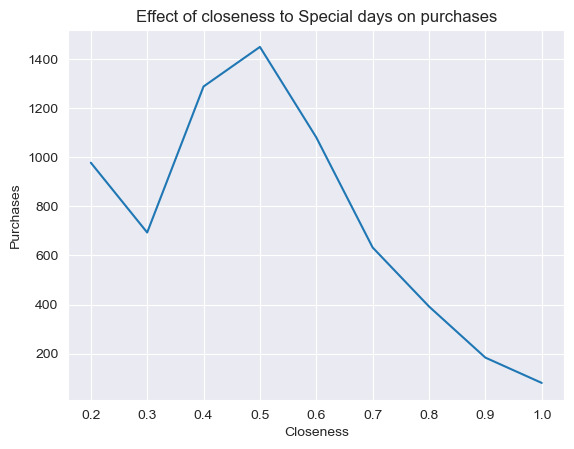

In [31]:
# Plotting the trend
sns.lineplot(
    special_purchases,
    x='Closeness',
    y='Purchases'
)

plt.title('Effect of closeness to Special days on purchases');


Purchases tend to increase when the closeness value is around the midpoint, indicating a balanced anticipation of the special day. As the date of the special event approaches, the likelihood of making a purchase gradually decreases. Conversely, when the event is farther away, purchase activity is relatively lower but starts to rise as the date nears, peaking at the midpoint before gradually declining again.

## Purchases on weekends

Effect of weekends on purchases

In [32]:
df.Wkd.value_counts()

Wkd
0    321053
1    128860
Name: count, dtype: int64

   Wkd       Rev
0    0  0.171043
1    1  0.356542


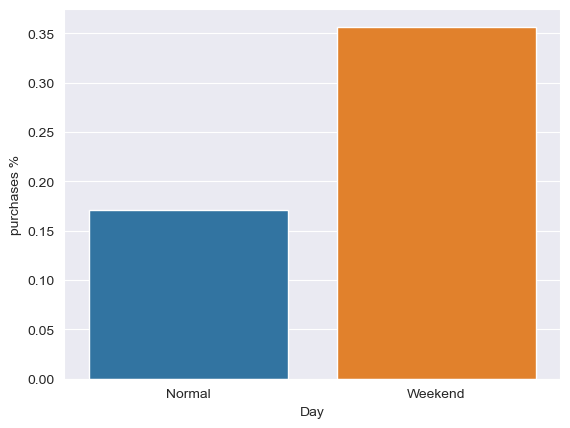

In [33]:
weekend_purchases = df.groupby('Wkd')['Rev'].mean().reset_index()

# plotting
sns.barplot(
    weekend_purchases,
    x='Wkd',
    y='Rev'
)
print(weekend_purchases)

plt.xticks([0, 1], labels=['Normal', 'Weekend'])
plt.xlabel('Day')
plt.ylabel('purchases %');

Purchases occur more on weekends than on normal days as indicated by the chart. About 35% of the visits in the weekends result to purchases compared to normal days at 17%.

## Page value

Investigating the effect of page value to the purchases.

In [34]:
df[['PgVal']].describe()

,PgVal
count,449913.000000
mean,5.500630
std,16.525529
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,360.740676


The page value ranges from 0 to 360. We bin the range to different values to get the  purchases as value increases.

C:\Users\mutis\AppData\Local\Temp\ipykernel_18132\934730105.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value_cat_purchases = value_df.groupby('val_cat')['Rev'].mean().reset_index()
c:\Users\mutis\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


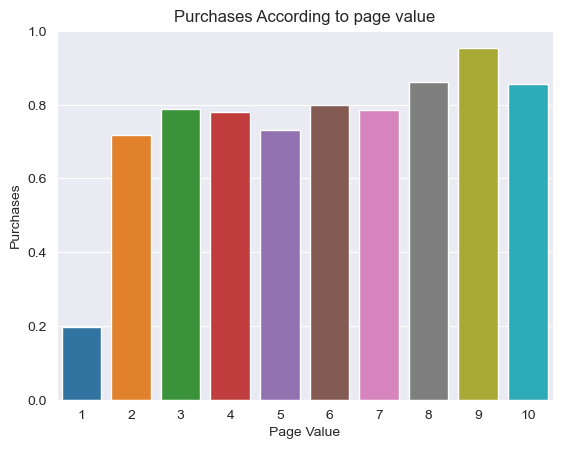

In [35]:
value_df = df.copy()
# binning the page value to 10 categories
value_df['val_cat'] = pd.cut(df['PgVal'], bins=10, labels=np.arange(1, 11))

# get the percentage of purchases
value_cat_purchases = value_df.groupby('val_cat')['Rev'].mean().reset_index()

# plotting
sns.barplot(
    value_cat_purchases,
    x='val_cat',
    y='Rev',
)

plt.title('Purchases According to page value')
plt.xlabel('Page Value')
plt.ylabel('Purchases');

There is an upward trend as the page value increases, more purchases are made.

# Data preparation

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449913 entries, 50000 to 499999
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Adm      449913 non-null  int64  
 1   AdmDur   449913 non-null  float64
 2   Inf      449913 non-null  int64  
 3   InfDur   449913 non-null  float64
 4   Prd      449913 non-null  int64  
 5   PrdDur   449913 non-null  float64
 6   BncRt    449913 non-null  float64
 7   ExtRt    449913 non-null  float64
 8   PgVal    449913 non-null  float64
 9   SpclDay  449913 non-null  float64
 10  Mo       449913 non-null  int64  
 11  OS       449913 non-null  int64  
 12  Bsr      449913 non-null  int64  
 13  Rgn      449913 non-null  int64  
 14  TfcTp    449913 non-null  int64  
 15  VstTp    449913 non-null  int64  
 16  Wkd      449913 non-null  int64  
 17  Rev      449913 non-null  float64
dtypes: float64(8), int64(10)
memory usage: 65.2 MB


most columns are either in float64 format or int64 but some of them are categorical. So we convert the categorical columns to object.

In [37]:
df[['Mo', 'OS', 'Bsr', 'Rgn', 'TfcTp', 'VstTp']] = (
    df[['Mo', 'OS', 'Bsr', 'Rgn', 'TfcTp', 'VstTp']].astype('object')
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449913 entries, 50000 to 499999
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Adm      449913 non-null  int64  
 1   AdmDur   449913 non-null  float64
 2   Inf      449913 non-null  int64  
 3   InfDur   449913 non-null  float64
 4   Prd      449913 non-null  int64  
 5   PrdDur   449913 non-null  float64
 6   BncRt    449913 non-null  float64
 7   ExtRt    449913 non-null  float64
 8   PgVal    449913 non-null  float64
 9   SpclDay  449913 non-null  float64
 10  Mo       449913 non-null  object 
 11  OS       449913 non-null  object 
 12  Bsr      449913 non-null  object 
 13  Rgn      449913 non-null  object 
 14  TfcTp    449913 non-null  object 
 15  VstTp    449913 non-null  object 
 16  Wkd      449913 non-null  int64  
 17  Rev      449913 non-null  float64
dtypes: float64(8), int64(4), object(6)
memory usage: 65.2+ MB


now our data is in the correct data types.

# Modelling

We first start by spitting the data to the train and test sets.

## Preprocessing

In [38]:
# importing modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [39]:
# the seed for random generators
random_state = 20

In [40]:
X = df.drop('Rev', axis=1)
y = df['Rev']
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=random_state)

We now proceed to create dummy variables for the categorical columns. Remember wkd is already a binary variable so we include it after creating dummy variables for the other categorical features.

In [41]:
# creating dummy variables for categorical
X_train_dummy = pd.get_dummies(X_train.select_dtypes('object'),
                               drop_first=True,
                               dtype=int)
# add weekend to the set of dummy variable
X_train_dummy['Wkd'] = df['Wkd']

## 1. Baseline model

For our case we first fit a Logistic regression model

In [42]:
y_train.value_counts(normalize=True)

Rev
0.0    0.775805
1.0    0.224195
Name: proportion, dtype: float64

There is class imbalance in the target variable with about 78% of the sessions leading to no purchases and other 22% to purchases.

We first fit a baseline model with the data as is.


In [43]:
scaler = StandardScaler()
numeric_training = X_train.select_dtypes(exclude='object').drop('Wkd',
                                                                axis=1)

# scaling X
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(numeric_training),
    columns=numeric_training.columns,
    index=numeric_training.index
)

X_train_scaled = pd.concat([X_train_scaled, X_train_dummy], axis=1)


baseline_model = LogisticRegression(random_state=random_state, solver='liblinear')
baseline_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=20, solver='liblinear')

### Evaluation of the baseline model

We use the log loss to measure the performance of the model. We measure both log loss in the performance of the model on train data and also use cross validation and get the log loss.

In [44]:
# importing the modules
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score


# Get the log loss for train and validation
baseline_train_loss = log_loss(y_train, baseline_model.decision_function(X_train_scaled) )

# use cross validation
val_scores = cross_val_score(baseline_model,
                             X_train_scaled,
                             y_train,
                             cv=10,
                             scoring='neg_log_loss')
baseline_validation_loss = -val_scores.mean()

print('Baseline model train log loss: ', baseline_train_loss)
print('Baseline_model validation log loss: ', baseline_validation_loss)

Baseline model train log loss:  6.490913445799422
Baseline_model validation log loss:  0.4416013217663197


This model performs better in the validation data, but this could mean underfitting due to the difference in the log loss between train and validation data performance.

## 2. Fix class imbalance

There is class imbalance in the targer with about 78% for one class and 22% for the other.

We use SMOTE oversampling to fix this but not on the whole train data. This is because of data leakage during cross validation. We therefore define afunction to carry out cross validation and include smote.

In [50]:
# Creating a custom function for validation to include smote
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from imblearn.over_sampling import SMOTE


# function for validation
def get_train_val_loss(model, X_train, y_train, cont_cols, cat_cols):
    """calculates the validation log loss and the train log loss and includes 
    SMOTE oversampling to reduce class imbalance
    Args:
        model: the model
        X_train: the model features for train data where dummy variables are already
            created
        y_train: the target in the train data
        cont_cols: list of continuous columns
        cat_cols: list of categorical columns
    Returns:
        val_loss: validation log loss which is the mean of the test scores
    """
    # making a copy of the model not to change the original one
    modelcp = clone(model)
    
    sm = SMOTE(random_state=random_state)
    scaler = StandardScaler()
    
    # cross validation
    kfold = StratifiedKFold(n_splits=3)
    train_scores = np.ndarray(3)
    test_scores = np.ndarray(3)
    
    
    
    for i, (train_idx, test_idx) in enumerate(kfold.split(X_train, y_train)):
        X_t = X_train.iloc[train_idx]
        y_t = y_train.iloc[train_idx]
        X_v = X_train.iloc[test_idx]
        y_v = y_train.iloc[test_idx]
        
        # scaling
        # first separating continuous and categorical features
        # scaling the training set
        X_t_cat = X_t[cat_cols]
        X_t_cont = pd.DataFrame(
            scaler.fit_transform(X_t[cont_cols]),
            columns=cont_cols,
            index=X_t.index
        )
        # the test set
        X_v_cat = X_v[cat_cols]
        X_v_cont = pd.DataFrame(
            scaler.transform(X_v[cont_cols]),
            columns=cont_cols,
            index=X_v.index
        )
        
        # joinig categorical and continuous back together
        X_t_scaled = pd.concat(
            [X_t_cont, X_t_cat],
            axis=1
        )
        
        X_v_scaled = pd.concat(
            [X_v_cont, X_v_cat],
            axis=1
        )
        
        # Oversampling
        X_t_oversampled, y_t_oversampled = sm.fit_resample(X_t_scaled, y_t)
        
        # fitting model
        modelcp.fit(X_t_oversampled, y_t_oversampled)
        
        # training log loss 
        cross_train_score = log_loss(y_t_oversampled, modelcp.predict_proba(X_t_oversampled))
        
        # validation log loss
        cross_test_score = log_loss(y_v, modelcp.predict_proba(X_v_scaled))
        
        # append to list
        train_scores[i] =  cross_train_score
        test_scores[i] =  cross_test_score

    train_loss = train_scores.mean()
    val_loss = test_scores.mean()
    
    return train_loss, val_loss

First i convert the X_train to contain only dummy variables and create two lists to contain the names for categorical and continuous columns.

In [46]:
# creating list for categorical and continuous columns
cat_cols = X_train_dummy.columns
cont_cols = list(X_train.select_dtypes(exclude='object'))
cont_cols.remove('Wkd')

# preprocessed X train
X_train_preprocessed = pd.concat(
    [numeric_training, X_train_dummy],
    axis=1
)
X_train_preprocessed

,Adm,AdmDur,Inf,InfDur,Prd,PrdDur,BncRt,ExtRt,PgVal,SpclDay,...,TfcTp_7,TfcTp_8,TfcTp_9,TfcTp_10,TfcTp_11,TfcTp_12,TfcTp_13,VstTp_1,VstTp_2,Wkd
199738,0,0.00,0,0.00,22,758.22,0.000000,0.017185,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
52555,3,35.97,2,15.98,74,4206.55,0.019160,0.026590,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
311137,0,0.00,0,0.00,3,258.25,0.000000,0.031969,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
325494,4,98.46,0,0.00,10,63.57,0.065401,0.082387,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
379185,3,18.92,0,0.00,8,343.35,0.000000,0.007333,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81962,0,0.00,0,0.00,16,242.39,0.000000,0.004898,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,1
270085,0,0.00,0,0.00,4,46.23,0.000000,0.084468,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
335966,3,93.33,0,0.00,1,4.00,0.000000,0.042272,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,0
87136,6,188.81,0,0.00,7,601.31,0.020828,0.029748,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


In [262]:
oversampled_train_loss, oversampled_val_loss = get_train_val_loss(
    baseline_model,
    X_train_preprocessed,
    y_train,
    cont_cols,
    cat_cols
)
print('Oversampled model train log loss:', oversampled_train_loss)
print('Oversampled model val log loss:', oversampled_val_loss)

Oversampled model train log loss: 6.920449322542662
Oversampled model val log loss: 4.653150186266458


This model performs worse than the baseline model indicatied by the higher log loss, but the variance bias tradeoff is better in this model. 

## 3. Less regularization

We try to reduce the regularization to improve the performance.

In [263]:
c_vals = [10, 100, 1e3, 1e6]
for c in c_vals:
    less_reg_model = LogisticRegression(solver='liblinear',
                                        random_state=random_state,
                                        C=c)

    # getting train and validation scores for the  model 
    less_reg_train_loss, less_reg_val_loss = get_train_val_loss(less_reg_model,
                                                                X_train_preprocessed,
                                                                y_train,
                                                                cont_cols,
                                                                cat_cols)


    print(f'Less regularization({c}) model log loss on train data:', less_reg_train_loss)
    print(f'Less Regularization({c}) model log loss on validation:', less_reg_val_loss)
    print()

Less regularization(10) model log loss on train data: 6.924038233818931
Less Regularization(10) model log loss on validation: 4.655176337979004

Less regularization(100) model log loss on train data: 6.924221889515656
Less Regularization(100) model log loss on validation: 4.655790669341802

Less regularization(1000.0) model log loss on train data: 6.924181771152384
Less Regularization(1000.0) model log loss on validation: 4.65594174372054

Less regularization(1000000.0) model log loss on train data: 6.9243141564783235
Less Regularization(1000000.0) model log loss on validation: 4.655940369179685



Performance gets worse with less regularization. Lets try increasing the  regularization.

In [287]:
c_vals = [.1, .01, .001, 1e-4, .1e-5, 1e-6, 1e-7, 1e-8]
l2_log_loss_items = []
for c in c_vals:
    item = {
        'c': c
    }
    less_reg_model = LogisticRegression(solver='liblinear',
                                  random_state=random_state,
                                  C=c)
    l2_train_loss, l2_val_loss = get_train_val_loss(less_reg_model,
                                                    X_train_preprocessed,
                                                    y_train,
                                                    cont_cols,
                                                    cat_cols)

    item['train_loss'] = l2_train_loss
    item['val_loss'] = l2_val_loss
    l2_log_loss_items.append(item)
    


In [288]:
l2_loss_df = pd.DataFrame(l2_log_loss_items)
l2_loss_df['Train val difference'] = l2_loss_df['train_loss'] - \
    l2_loss_df['val_loss']

l2_loss_df

,c,train_loss,val_loss,Train val difference
0,1.000000e-01,6.889687,4.623700,2.265987
1,1.000000e-02,6.735191,4.438825,2.296366
2,1.000000e-03,6.796242,4.224101,2.572141
3,1.000000e-04,7.092018,3.981004,3.111014
4,1.000000e-06,6.584323,2.946785,3.637538
5,1.000000e-06,6.584323,2.946785,3.637538
6,1.000000e-07,7.051304,3.141002,3.910302
7,1.000000e-08,7.819918,3.485243,4.334676


### Plotting log loss at different regularization for L2

c:\Users\mutis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mutis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mutis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mutis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

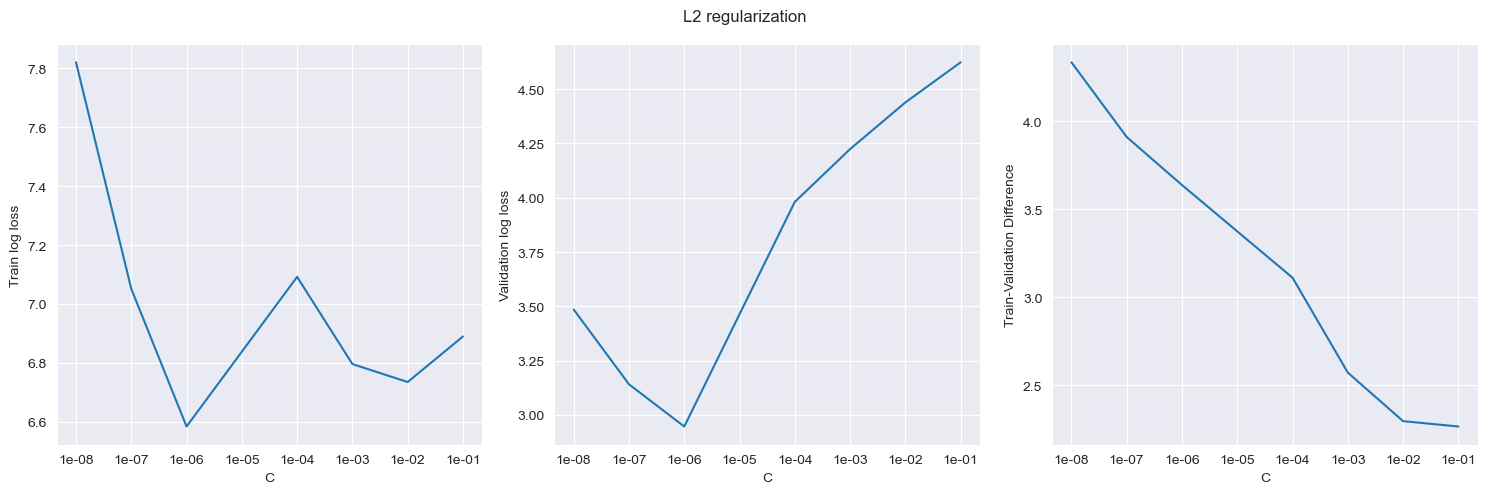

In [291]:
from matplotlib.ticker import FuncFormatter

# Plotting


def scientific_format(x, _):
    return f'{x:.0e}'


# Plotting
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

# c vs train loss
sns.lineplot(
    data=l2_loss_df,
    x='c',
    y='train_loss',
    ax=axes[0]
)
axes[0].set_xlabel('C')
axes[0].set_ylabel('Train log loss')
axes[0].set_xscale('log')
axes[0].set_xticks([0.1, 0.01, 0.001, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8])
axes[0].xaxis.set_major_formatter(FuncFormatter(scientific_format))

# c vs val loss
sns.lineplot(
    data=l2_loss_df,
    x='c',
    y='val_loss',
    ax=axes[1]
)
axes[1].set_xlabel('C')
axes[1].set_ylabel('Validation log loss')
axes[1].set_xscale('log')
axes[1].set_xticks([0.1, 0.01, 0.001, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8])
axes[1].xaxis.set_major_formatter(FuncFormatter(scientific_format))

# c vs difference
sns.lineplot(
    data=l2_loss_df,
    x='c',
    y='Train val difference',
    ax=axes[2]
)
axes[2].set_xlabel('C')
axes[2].set_ylabel('Train-Validation Difference')
axes[2].set_xscale('log')
axes[2].set_xticks([0.1, 0.01, 0.001, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8])
axes[2].xaxis.set_major_formatter(FuncFormatter(scientific_format))

fig.suptitle('L2 regularization')
plt.tight_layout()
plt.show()

For l2 regularization, As the regularization increases(lower C value), the difference between log loss in train data and validation data increases indicating possibility of underfitting.

Even when the log loss is low in train and validation sets at around C = 1e06, there is underfitting.

## 4. L1 regularization

We start with the l1 Regularization(Lasso)

In [264]:
c_vals = [1, 10, 100, 1e3, 1e6]
for c in c_vals:
    l1_model = LogisticRegression(solver='saga',
                                random_state=random_state,
                                penalty='l1',
                                C=c)
    l1_train_loss, l1_val_loss = get_train_val_loss(l1_model,
                                                    X_train_preprocessed,
                                                    y_train,
                                                    cont_cols,
                                                    cat_cols)

    print(f'L1 regularization({c}) model log loss on train data:', l1_train_loss)
    print(f'L1 Regularization({c}) model log loss on validation:', l1_val_loss)
    print()

L1 regularization(1) model log loss on train data: 6.922744438179024
L1 Regularization(1) model log loss on validation: 4.654101704215641

L1 regularization(10) model log loss on train data: 6.923966945276252
L1 Regularization(10) model log loss on validation: 4.655553510318879

L1 regularization(100) model log loss on train data: 6.924042418229262
L1 Regularization(100) model log loss on validation: 4.655453570349502

L1 regularization(1000.0) model log loss on train data: 6.924046941811287
L1 Regularization(1000.0) model log loss on validation: 4.655460839683827

L1 regularization(1000000.0) model log loss on train data: 6.9240480871271375
L1 Regularization(1000000.0) model log loss on validation: 4.655462966680484



In [284]:
c_vals = [.1, .01, .001, 1e-4, .1e-5, 1e-6, 1e-7,1e-8]
l1_log_loss_items = []
for c in c_vals:
    item = {
        'c': c
    }
    l1_model = LogisticRegression(solver='saga',
                                  random_state=random_state,
                                  penalty='l1',
                                  C=c)
    l1_train_loss, l1_val_loss = get_train_val_loss(l1_model,
                                                    X_train_preprocessed,
                                                    y_train,
                                                    cont_cols,
                                                    cat_cols)

    item['train_loss'] = l1_train_loss
    item['val_loss'] = l1_val_loss
    l1_log_loss_items.append(item)
    

,c,train_loss,val_loss,Train val difference
0,1.000000e-01,6.909002,4.636216,2.272786
1,1.000000e-02,6.764112,4.422848,2.341265
2,1.000000e-03,6.621629,3.992579,2.629050
3,1.000000e-04,8.727381,4.462992,4.264389
4,1.000000e-06,2.256407,1.018138,1.238269
5,1.000000e-06,2.256407,1.018138,1.238269
6,1.000000e-07,2.256577,1.018213,1.238364
7,1.000000e-08,2.256577,1.018213,1.238364


In [286]:
l1_loss_df = pd.DataFrame(l1_log_loss_items)
l1_loss_df['Train val difference'] = l1_loss_df['train_loss'] - \
    l1_loss_df['val_loss']
l1_loss_df

,c,train_loss,val_loss,Train val difference
0,1.000000e-01,6.909002,4.636216,2.272786
1,1.000000e-02,6.764112,4.422848,2.341265
2,1.000000e-03,6.621629,3.992579,2.629050
3,1.000000e-04,8.727381,4.462992,4.264389
4,1.000000e-06,2.256407,1.018138,1.238269
5,1.000000e-06,2.256407,1.018138,1.238269
6,1.000000e-07,2.256577,1.018213,1.238364
7,1.000000e-08,2.256577,1.018213,1.238364


### Comparing log loss at different L1 regularizations

c:\Users\mutis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mutis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mutis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mutis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

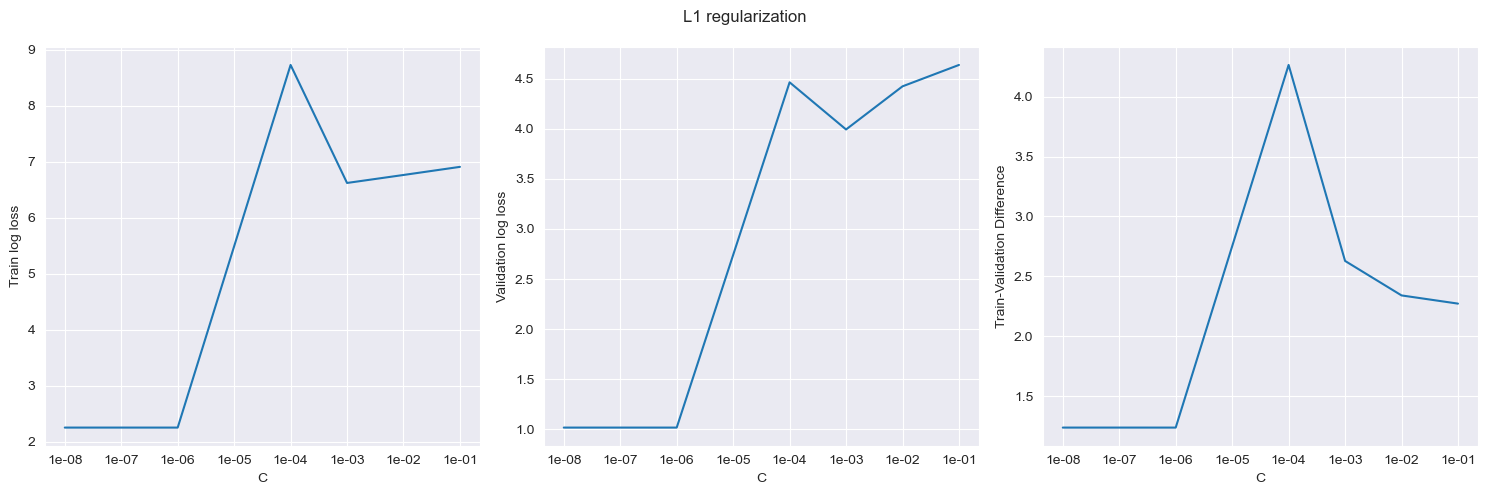

In [292]:

# Plotting
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

# c vs train loss
sns.lineplot(
    data=l1_loss_df,
    x='c',
    y='train_loss',
    ax=axes[0]
)
axes[0].set_xlabel('C')
axes[0].set_ylabel('Train log loss')
axes[0].set_xscale('log')
axes[0].set_xticks([0.1, 0.01, 0.001, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8])
axes[0].xaxis.set_major_formatter(FuncFormatter(scientific_format))

# c vs val loss
sns.lineplot(
    data=l1_loss_df,
    x='c',
    y='val_loss',
    ax=axes[1]
)
axes[1].set_xlabel('C')
axes[1].set_ylabel('Validation log loss')
axes[1].set_xscale('log')
axes[1].set_xticks([0.1, 0.01, 0.001, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8])
axes[1].xaxis.set_major_formatter(FuncFormatter(scientific_format))

# c vs difference
sns.lineplot(
    data=l1_loss_df,
    x='c',
    y='Train val difference',
    ax=axes[2]
)
axes[2].set_xlabel('C')
axes[2].set_ylabel('Train-Validation Difference')
axes[2].set_xscale('log')
axes[2].set_xticks([0.1, 0.01, 0.001, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8])
axes[2].xaxis.set_major_formatter(FuncFormatter(scientific_format))
fig.suptitle('L1 regularization')
plt.tight_layout()
plt.show()

## 5. Elasticnet regularization

In [265]:
for c in c_vals:
    elasticnet_model = LogisticRegression(solver='saga',
                                        random_state=random_state,
                                        penalty='elasticnet',
                                        l1_ratio=.5,
                                        C=10)
    elasticnet_train_loss, elasticnet_val_loss = get_train_val_loss(elasticnet_model,
                                                                    X_train_preprocessed,
                                                                    y_train,
                                                                    cont_cols,
                                                                    cat_cols)

    print(f'Elasticnet regularization({c}) model log loss on train data:', 
          elasticnet_train_loss)
    print(f'Elasticnet Regularization({c}) model log loss on validation:', 
          elasticnet_val_loss)
    print()

Elasticnet regularization(1) model log loss on train data: 6.9238287176437
Elasticnet Regularization(1) model log loss on validation: 4.655310505298025

Elasticnet regularization(10) model log loss on train data: 6.9238287176437
Elasticnet Regularization(10) model log loss on validation: 4.655310505298025

Elasticnet regularization(100) model log loss on train data: 6.9238287176437
Elasticnet Regularization(100) model log loss on validation: 4.655310505298025

Elasticnet regularization(1000.0) model log loss on train data: 6.9238287176437
Elasticnet Regularization(1000.0) model log loss on validation: 4.655310505298025

Elasticnet regularization(1000000.0) model log loss on train data: 6.9238287176437
Elasticnet Regularization(1000000.0) model log loss on validation: 4.655310505298025



## Decision tree

In [51]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=random_state)
dt_train_loss, dt_val_loss = get_train_val_loss(dt_model,
                                                X_train_preprocessed,
                                                y_train,
                                                cont_cols,
                                                cat_cols)
print('Decision tree model train log loss:', dt_train_loss)
print('Decision tree model val log loss:', dt_val_loss)

Decision tree model train log loss: 2.2204460492503136e-16
Decision tree model val log loss: 1.2855413756113048


Comparing all the models, the baseline model performs better on the validation set but the difference in the log loss in the training and the validation could imply underfitting.


On further investigation, the l1 model with more regularization is our best model. It has the lowest log loss with a good balance in bias and variance this reducing chances of overfitting or underfitting.

# Evaluation of the final model

Our best performing model is the l1 model with higher regularization. We now preprocess the full training and test data and evaluate the model.

In [268]:
final_model = LogisticRegression(random_state=random_state,
                                 penalty='l1',
                                 C=1e06,
                                 solver='saga')

final_scaler = StandardScaler()
final_sm = SMOTE(random_state=random_state)

X_train_cont = X_train_preprocessed[cont_cols]
X_train_cat = X_train_preprocessed[cat_cols]

# scaling X for train data
X_train_scaled = pd.DataFrame(
    final_scaler.fit_transform(X_train_cont),
    columns=X_train_cont.columns,
    index=X_train_cont.index
)

X_train_scaled = pd.concat([X_train_scaled, X_train_cat], axis=1)

# scaling X for test data
X_test_dummy = pd.get_dummies(X_test.select_dtypes('object'),
                              drop_first=True,
                              dtype=int)
X_test_dummy['Wkd'] = X_test['Wkd']

numeric_test = X_test.select_dtypes(exclude='object').drop('Wkd',
                                                           axis=1)

X_test_scaled = pd.DataFrame(
    final_scaler.transform(numeric_test),
    columns=numeric_test.columns,
    index=numeric_test.index,
)

X_test_scaled = pd.concat(
    [X_test_scaled, X_test_dummy],
    axis=1
)

# oversampling to reduce class imbalance
X_train_oversampled, y_train_oversampled = final_sm.fit_resample(X_train_scaled,
                                                           y_train)
# fitting the model
final_model.fit(X_train_oversampled, y_train_oversampled)

LogisticRegression(C=1000000.0, penalty='l1', random_state=20, solver='saga')

In [269]:
# importing modules
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

## Accuracy

In [270]:
y_pred = final_model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7406004676428489

This means that out of all the predictions our model made, 74% were correct.

## Recall

In [271]:
recall_score(y_test, y_pred)

0.6516047129765541

This means that out of all the customers that had purchase intent, our model was able to predict about 65%.

## Precision

In [272]:
precision_score(y_test, y_pred)

0.44608908202064096

Out of all the customers that our model predicted as having purchase intent, about 45% actually had purchase intent.

## F1- score

In [273]:
f1_score(y_test, y_pred)

0.5296080739033002

# Conclusion

The predictive model successfully identifies potential buyers with a recall rate of 65%, capturing a significant portion of users likely to make a purchase. Although the precision is 45%, indicating that not all predicted buyers convert, the model still provides valuable insights for targeting marketing efforts. By focusing on the users with the highest likelihood of purchasing and continuously refining the model, we can enhance the efficiency of our marketing strategies and drive increased sales. Implementing these insights will enable us to optimize resource allocation and improve overall conversion rates.

## predicting rev for missing set

In [274]:
missing_rev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Adm      50000 non-null  int64  
 1   AdmDur   50000 non-null  float64
 2   Inf      50000 non-null  int64  
 3   InfDur   50000 non-null  float64
 4   Prd      50000 non-null  int64  
 5   PrdDur   50000 non-null  float64
 6   BncRt    50000 non-null  float64
 7   ExtRt    50000 non-null  float64
 8   PgVal    50000 non-null  float64
 9   SpclDay  50000 non-null  float64
 10  Mo       50000 non-null  int64  
 11  OS       50000 non-null  int64  
 12  Bsr      50000 non-null  int64  
 13  Rgn      50000 non-null  int64  
 14  TfcTp    50000 non-null  int64  
 15  VstTp    50000 non-null  int64  
 16  Wkd      50000 non-null  int64  
 17  Rev      0 non-null      float64
dtypes: float64(8), int64(10)
memory usage: 7.2 MB


In [275]:
missing_rev[['Mo', 'OS', 'Bsr', 'Rgn', 'TfcTp', 'VstTp']] = (
    missing_rev[['Mo', 'OS', 'Bsr', 'Rgn', 'TfcTp', 'VstTp']].astype('object')
)
missing_rev.drop('Rev', axis=1, inplace=True)

C:\Users\mutis\AppData\Local\Temp\ipykernel_17580\2206965402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_rev[['Mo', 'OS', 'Bsr', 'Rgn', 'TfcTp', 'VstTp']] = (
C:\Users\mutis\AppData\Local\Temp\ipykernel_17580\2206965402.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_rev.drop('Rev', axis=1, inplace=True)


In [276]:
missing_numeric = missing_rev.select_dtypes(exclude='object').drop('Wkd',
                                                                   axis=1)
missing_rev_dummy = pd.get_dummies(missing_rev.select_dtypes('object'),
                                   drop_first=True,
                                   dtype=int)
missing_rev_dummy['Wkd'] = missing_rev['Wkd']

missing_rev_scaled = pd.DataFrame(
    final_scaler.transform(missing_numeric),
    columns=missing_numeric.columns,
    index=missing_numeric.index,
)

missing_rev_scaled = pd.concat(
    [missing_rev_scaled, missing_rev_dummy],
    axis=1
)

missing_pred = final_model.predict(missing_rev_scaled)

In [300]:
predicted = pd.DataFrame(missing_pred, columns=['Rev'])
predicted['id'] = missing_rev.index + 1
predicted = predicted[['id', 'Rev']].astype('Int64').set_index('id')
predicted

,Rev
id,
1,0
2,1
3,1
4,1
5,0
...,...
49996,1
49997,0
49998,1


In [301]:
predicted.to_csv('predicted.csv')